In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [6]:
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop("Cabin", axis=1, inplace=True)

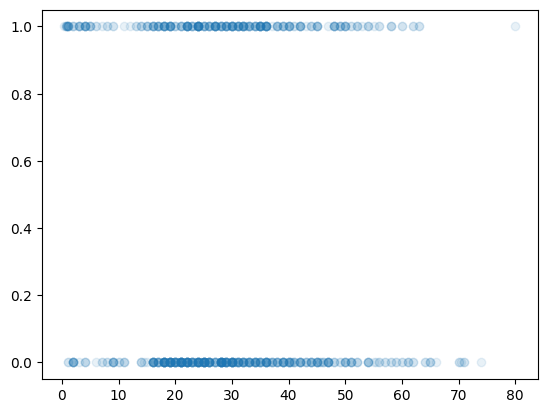

In [10]:
plt.scatter(x="Age", y="Survived", data=df, alpha=0.1)

In [11]:
df[(df["Age"]>70) & (df["Survived"]==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


In [12]:
toplam = df[(df["Age"]<20) & (df["Survived"]==1)]
len(toplam)

79

In [13]:
toplam = df[(df["Age"]<20) & (df["Survived"]==0)]
len(toplam)

85

In [17]:
toplam = df[(df["Age"]<15) & (df["Survived"]==1)]
len(toplam) / len(df[df["Age"]<15])

0.5769230769230769

In [18]:
len(df[df["Survived"]==1])

342

In [19]:
mort = round(len(df[df["Survived"]==1]) / len(df["Survived"])*100)

In [20]:
print("titanik hayatta kalma oranı : %", mort)

titanik hayatta kalma oranı : % 38


In [21]:
age_na = df[df["Age"].isna()]
age_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [22]:
age_na.value_counts("Survived")

Survived
0    125
1     52
Name: count, dtype: int64

In [23]:
age_na.value_counts("Pclass")

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [24]:
df.value_counts("Pclass")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [25]:
#yaşı belli olmayanları sil

df = df.dropna()

<Axes: xlabel='Age', ylabel='Pclass'>

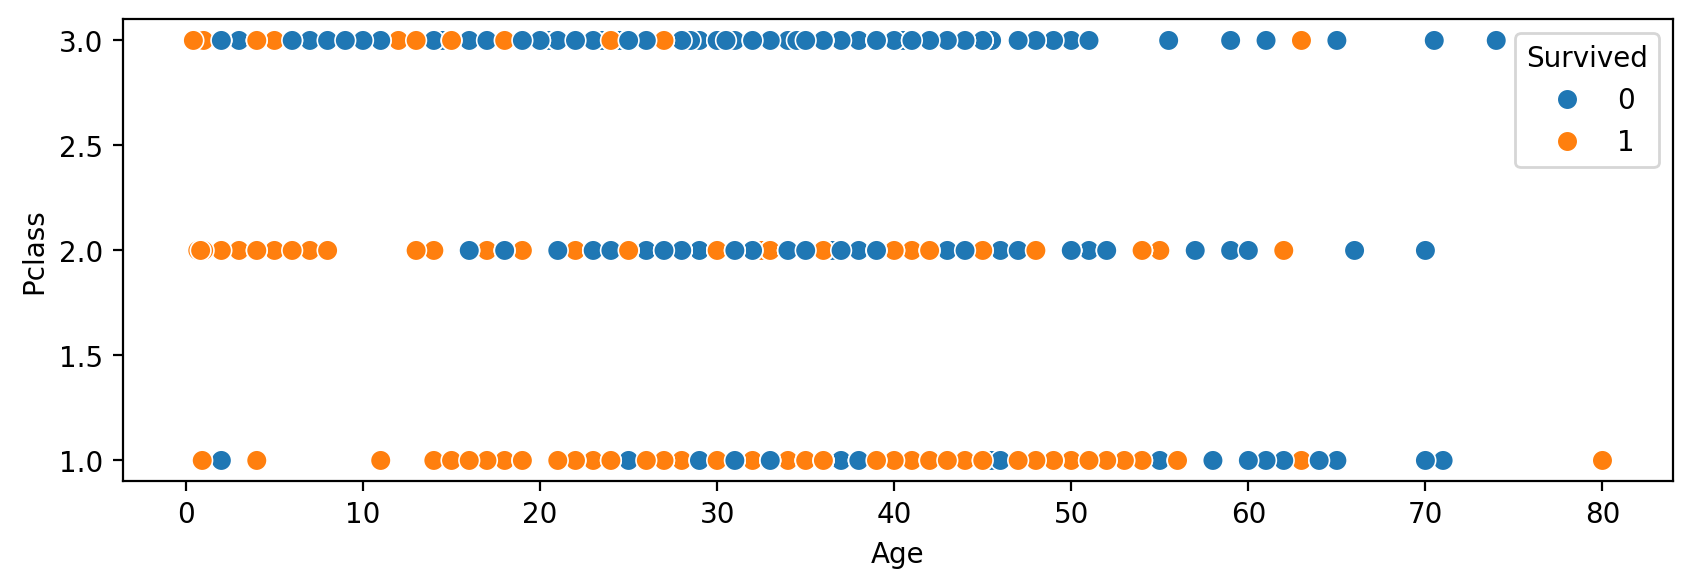

In [27]:
plt.figure(figsize=(10,3), dpi=200)
sns.scatterplot(x="Age", y="Pclass", data=df, hue="Survived", s=55)

In [28]:
df[["Pclass", "Survived"]].value_counts()

Pclass  Survived
3       0           270
1       1           120
2       0            90
3       1            85
2       1            83
1       0            64
Name: count, dtype: int64

(0.0, 300.0)

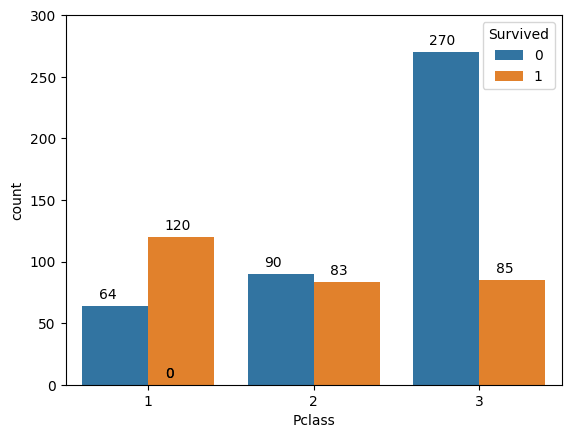

In [30]:
ax= sns.countplot(x="Pclass", data=df, hue="Survived")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))

plt.ylim(0,300)

## train test split

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(["PassengerId", "Name", "Ticket", "Survived"], axis=1)
X= pd.get_dummies(X, drop_first=True)
y=df["Survived"]

In [34]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [41]:
model = SVC()

In [42]:
C = 10.0 ** np.arange(-2,4)

In [44]:
parameters ={
    "C" : C,
    "kernel" : ["rbf", "poly"],
    "degree" : [2,3,4]
}

In [46]:
grid = GridSearchCV(model, parameters, cv=9)
grid.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'poly']})

In [47]:
grid.best_params_

{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}

In [48]:
jack = grid.predict(X_test)

In [49]:
grid.best_score_

0.7972582972582973

In [50]:
from grid_plot import GridSearch_table_plot

best parameters: {'C': 1000.0, 'degree': 2, 'kernel': 'poly'}
best score:      0.79726 (+/-0.02303)
{'C': 1000.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
31,0.174822,0.130276,0.002102,0.000631,1000.0,2,poly,"{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}",0.821429,0.767857,0.767857,0.818182,0.818182,0.763636,0.800000,0.800000,0.818182,0.797258,0.023026,1
24,0.008591,0.000964,0.002918,0.000974,100.0,2,rbf,"{'C': 100.0, 'degree': 2, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
28,0.007391,0.000778,0.002409,0.000758,100.0,4,rbf,"{'C': 100.0, 'degree': 4, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
26,0.007805,0.000562,0.002736,0.000512,100.0,3,rbf,"{'C': 100.0, 'degree': 3, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
32,0.025361,0.004114,0.002043,0.000272,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
30,0.025346,0.004122,0.002644,0.000624,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
34,0.025911,0.004005,0.002895,0.001312,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
33,1.383625,0.764484,0.002375,0.000695,1000.0,3,poly,"{'C': 1000.0, 'degree': 3, 'kernel': 'poly'}",0.732143,0.714286,0.732143,0.727273,0.709091,0.654545,0.745455,0.763636,0.654545,0.714791,0.035553,8
22,0.006953,0.000889,0.002892,0.000481,10.0,4,rbf,"{'C': 10.0, 'degree': 4, 'kernel': 'rbf'}",0.696429,0.678571,0.714286,0.672727,0.800000,0.581818,0.800000,0.690909,0.709091,0.704870,0.062662,9
20,0.006693,0.001145,0.003130,0.000558,10.0,3,rbf,"{'C': 10.0, 'degree': 3, 'kernel': 'rbf'}",0.696429,0.678571,0.714286,0.672727,0.800000,0.581818,0.800000,0.690909,0.709091,0.704870,0.062662,9


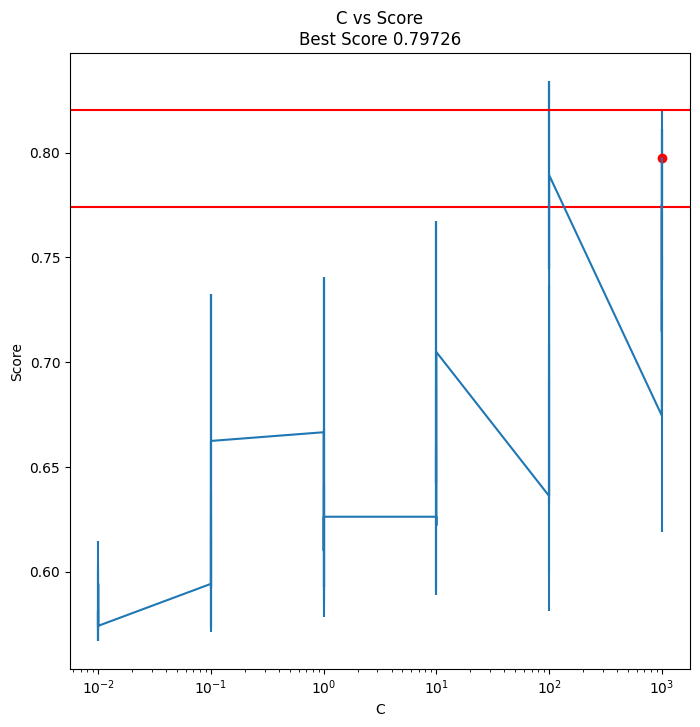

In [51]:
GridSearch_table_plot(grid, "C", negative=False)

In [52]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

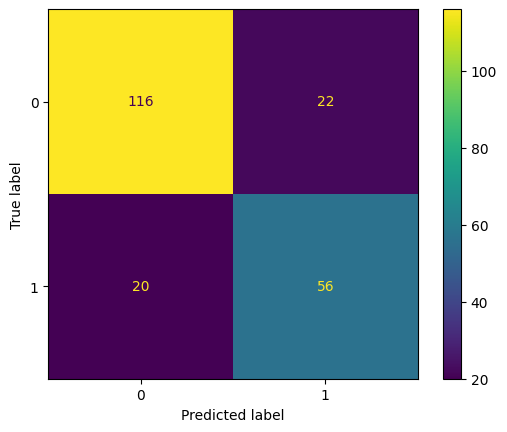

In [55]:
ConfusionMatrixDisplay.from_estimator(grid, X_test,y_test)

In [56]:
print(classification_report(y_test, jack))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       138
           1       0.72      0.74      0.73        76

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214

